In [95]:
from dl import queryClient as qc
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np
from matplotlib.colors import LogNorm
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table
import statistics as st
from numpy import nan
from dlnpyutils import utils as dln

In [96]:
lmc_catalog = Table.read('/Users/slaterjonesoden/Desktop/LMC_Periphery/lmc_distant_hydramike_gaiaedr3_extra.fits')

# lmc_gaia_catalog_source_10deg_dec53 = Table.read('/Users/slaterjonesoden/Desktop/LMC_Periphery/gaia_source_10deg_ra_dec_90_53_extra.fits')

lmc_apogee_catalog = Table.read('/Users/slaterjonesoden/Desktop/LMC_Periphery/lmc_rgbmembers.dr17rev1_qacuts.fits')

lmc_gaia_catalog_source_10deg_dec53 = Table.read('/Users/slaterjonesoden/Desktop/LMC_Periphery/LMC_Periphery_Project/gaia_source_10deg_ra_dec_90_53.fits')

lmc_sdssv_catalog = Table.read('/Users/slaterjonesoden/Desktop/LMC_Periphery/spAll-lite-v6_1_0_mc.fits.gz')


lmc_maps_catalog = Table.read('/Users/slaterjonesoden/Desktop/LMC_Periphery/maps_spectra_results_gaiaedr3.fits')


In [3]:
print(np.max(lmc_gaia_catalog_source_10deg_dec53["pmml"]) - np.min(lmc_gaia_catalog_source_10deg_dec53["pmml"]))


1253.2298498161917


In [161]:
# lmc_gaia_catalog_source_10deg_dec53['lmc_radius_correct'] = ((lmc_gaia_catalog_source_10deg_dec53['mlon'])**2 + (lmc_gaia_catalog_source_10deg_dec53['mlat'] - 2.3 )**2 )**(0.5)


In [162]:
# lmc_gaia_catalog_source_10deg_dec53.write("gaia_source_10deg_ra_dec_90_53.fits", overwrite="True")
# lmc_gaia_catalog_source_10deg_dec53 = Table.read('gaia_source_10deg_ra_dec_90_53.fits')

# Converting pmra and pmdec to pmml and pmml in lmc_gaia_catalog_source_10deg_dec53 catalog (Dont need anymore)

In [89]:
# Code to convert from ra,dec to Lat,Long in Magellanic Cloud Coordinates
import numpy as np
from gala.coordinates import MagellanicStreamNidever08
from astropy.coordinates import SkyCoord
import astropy.units as u

# convert pmra/pmdec to pmml/pmmb
coo = SkyCoord(ra=lmc_gaia_catalog_source_10deg_dec53['ra'].data*u.deg, dec=lmc_gaia_catalog_source_10deg_dec53['dec'].data*u.deg,
        pm_ra_cosdec=lmc_gaia_catalog_source_10deg_dec53['pmra'].data*u.mas/u.yr,
        pm_dec=lmc_gaia_catalog_source_10deg_dec53['pmdec'].data*u.mas/u.yr,frame='icrs')
mcoo = coo.transform_to(MagellanicStreamNidever08)
lmc_gaia_catalog_source_10deg_dec53['mlon'] = 0.0
lmc_gaia_catalog_source_10deg_dec53['mlat'] = 0.0
lmc_gaia_catalog_source_10deg_dec53['pmml'] = 0.0
lmc_gaia_catalog_source_10deg_dec53['pmmb'] = 0.0
lmc_gaia_catalog_source_10deg_dec53['mlon'] = mcoo.L
lmc_gaia_catalog_source_10deg_dec53['mlat'] = mcoo.B
lmc_gaia_catalog_source_10deg_dec53['pmml'] = mcoo.pm_L_cosB.value
lmc_gaia_catalog_source_10deg_dec53['pmmb'] = mcoo.pm_B.value

# pmml 1.80 , pmmb 0.45, pmdist < 1.3

pmdist = np.sqrt((lmc_gaia_catalog_source_10deg_dec53['pmml']-1.70)**2 + (lmc_gaia_catalog_source_10deg_dec53['pmmb']-0.10)**2)
# gdpm, = np.where((pmdist < 0.7))


In [4]:
lmc_gaia_catalog_source_10deg_dec53

ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,pm,radial_velocity,radial_velocity_error,b,l,ecl_lat,ecl_lon,teff_gspphot,logg_gspphot,phot_bp_mean_mag,phot_rp_mean_mag,phot_g_mean_mag,mlon,mlat,pmml,pmmb,lmc_radius_correct
,,,,,,,,,,,,,,,,,,,,,,deg,deg,,,deg
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
81.72073155499255,1.092536,-44.68593831341766,2.276691,--,--,--,--,--,--,--,--,--,-33.28791997088043,250.43774181442325,-67.67633436071266,74.36359520793094,--,--,20.989271,20.401815,21.037842,-1.0226122935555395,27.485132981495468,--,--,25.205885407946727
81.59659336709106,0.013551,-44.68139342582246,0.01407,-1.9274768593295664,0.017664,3.831436545459652,0.018681,0.7779805121847029,0.014788,4.288948,46.189423,7.450149,-33.3750420218606,250.4199639240408,-67.65843839539018,74.1358259555935,6109.008,4.2374,14.874549,14.125869,14.581839,-1.1222358035841467,27.48531439258438,-2.118640849244839,3.7291331428424295,25.21030492184028
81.5991183629412,0.238059,-44.68265562838401,0.253279,0.5990657224034159,0.307365,11.56340623145422,0.355697,0.5225883232358243,0.262731,11.578914,--,--,-33.37340594891319,250.4217155068266,-67.65996027622286,74.13998577087143,--,--,20.573849,18.988268,19.867178,-1.1201427846760907,27.48414448750823,0.014481744721718787,11.578904684488197,25.209043088260078
81.57218640508317,0.110315,-44.668853362306315,0.109927,0.2697512316780356,0.134006,3.1060991549485433,0.145237,0.5257280110462386,0.118204,3.11779,--,--,-33.390820110112394,250.40262854895795,-67.64338900138166,74.09576945361233,4426.121,4.6719,19.495504,18.02126,18.72092,-1.1424933998309825,27.496957170890546,0.1109938800890369,3.115814186684861,25.222845633281544
81.57650191561896,0.064489,-44.667425938652194,0.068868,5.8208483845141465,0.080016,1.2799902765830176,0.088335,0.2534770475101792,0.071696,5.95992,--,--,-33.387605693643295,250.40135836610935,-67.64244871449029,74.10431787097777,5606.946,4.6551,18.249022,17.435766,17.895134,-1.139119864893928,27.498539139170767,5.748122546011964,1.5747184572731996,25.22427340509369
81.57536564075512,4.220991,-44.66310937945343,4.859737,--,--,--,--,--,--,--,--,--,-33.3879057727829,250.3961110902749,-67.63805930562107,74.10395671673247,--,--,20.63261,18.825827,21.496655,-1.1402776276152053,27.50280893740426,--,--,25.228591149791615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78.59240471404986,0.027155,-46.27036407768388,0.030955,2.7998815621443836,0.035778,-0.5336240585683079,0.037753,0.4076231330507416,0.030469,2.850279,--,--,-35.61555783441256,252.11059917796337,-68.83037408902881,67.75342106924803,5698.07,4.4999,16.492666,15.69571,16.176586,-3.3328758806708265,25.737455414328092,2.8404445770017883,-0.23657134843447292,23.6732418129536


In [97]:

lmc_sdssv_catalog['lmc_radius_correct'] = ((lmc_sdssv_catalog['mlon'])**2 + (lmc_sdssv_catalog['mlat'] - 2.3 )**2)**(0.5)


In [7]:
# lmc_sdssv_catalog.write('/Users/slaterjonesoden/Desktop/LMC_Periphery/', overwrite = True)


# All cuts on Gaia query data (CMD, pmdist)

In [99]:
# Need to exclude nan valus from gaia query catalog

pmdist = np.sqrt((lmc_gaia_catalog_source_10deg_dec53['pmml']-1.70)**2 + (lmc_gaia_catalog_source_10deg_dec53['pmmb']-0.10)**2)

good_catalog10_53 = lmc_gaia_catalog_source_10deg_dec53[np.where((pmdist < 1.6) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['ra']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['ra_error']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['dec']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['dec_error']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmra']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmra_error']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmdec']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmdec_error']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['parallax']) &
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['parallax_error']) &
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pm']) & 
#                                                      np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity']) & 
#                                                      np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity_error']) & 
#                                                      np.isfinite(lmc_gaia_catalog_source_5deg['teff_gspphot']) & 
#                                                      np.isfinite(lmc_gaia_catalog_source_5deg['logg_gspphot']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_bp_mean_mag']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_rp_mean_mag']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_g_mean_mag']))]

In [100]:
print(np.max(good_catalog10_53["pmml"]) - np.min(good_catalog10_53["pmml"]))


3.19867441604402


# CMD cut of Gaia query data

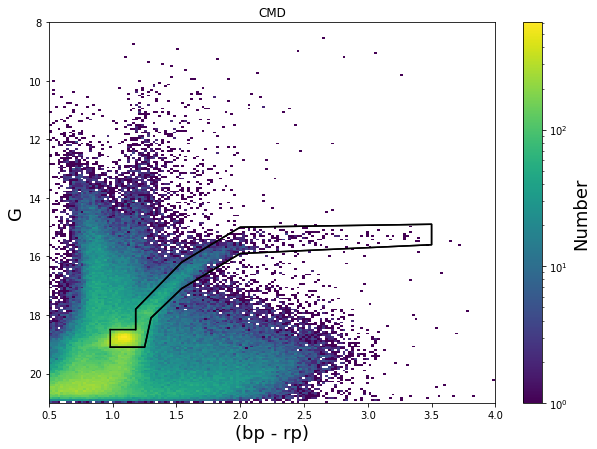

In [101]:
plt.figure(figsize=(10,7))


plt.hist2d(good_catalog10_53['phot_bp_mean_mag'] - good_catalog10_53['phot_rp_mean_mag'], 
          good_catalog10_53['phot_g_mean_mag'], range=None, bins=220, cmap='viridis', norm=LogNorm(), cmin=1)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('(bp - rp)', fontsize=18)
plt.ylabel('G', fontsize=18)
plt.xlim(0.5,4)
plt.ylim(8,21)

plt.gca().invert_yaxis()

x_vals = ([0.98, 0.98], [0.98, 1.25], [1.25, 1.3], [1.3, 1.54], [1.54, 2], [2, 3.5], 
          [3.5, 3.5], [3.5, 2], [2, 1.54], [1.54, 1.18], [1.18, 1.18], [1.18, 0.98])

y_vals = ([18.5, 19.1], [19.1, 19.1], [19.1, 18.1], [18.1, 17.1], [17.1, 15.9], [15.9, 15.6],
          [15.6, 14.9], [14.9, 15], [15, 16.2], [16.2, 17.8], [17.8, 18.5], [18.5, 18.5])

plt.plot(x_vals, y_vals, "BLACK")

# plt.plot([1.25,1.25], [12.5,14.5],"BLACK", [1.25,1.45], [14.5,14.5], "BLACK",
#         [1.45,1.6], [14.5,13], "BLACK", [1.6,1.8], [13,12.75], "BLACK", [1.8,3], [12.75,12.75], "BLACK", 
#         [3,3], [12.75,11], "BLACK", [3,1.7], [11,11], "BLACK", [1.7,1.25], [11,12.5], "BLACK" )

# coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
# coord.append(coord[0]) #repeat the first point to create a 'closed loop'

# xs, ys = zip(*coord) #create lists of x and y values

# plt.figure()
# plt.plot(xs,ys) 
plt.title("CMD")
cbar.set_label('Number', fontsize=18)
plt.show()

In [102]:
xcut3 = [0.98, 0.98, 1.25, 1.30, 1.54, 2.0, 3.5, 3.5, 3.5, 2, 1.54, 1.18, 1.18, 0.98]
ycut3 = [18.5, 19.1, 19.1, 18.1, 17.1, 15.9, 15.6, 14.9, 14.9, 15, 16.2, 17.8, 18.5, 18.5]
xdata3 = (good_catalog10_53['phot_bp_mean_mag']
         - good_catalog10_53['phot_rp_mean_mag'])
ydata3 = good_catalog10_53['phot_g_mean_mag']
ind3, cutind3 = dln.roi_cut(xcut3, ycut3, xdata3.data, ydata3.data)

In [103]:
RGB_CMD_cut = good_catalog10_53[cutind3]
leftover_foreground = good_catalog10_53[ind3]
print(len(RGB_CMD_cut))
print(len(leftover_foreground))
print(len(cutind3))
print(len(ind3))

43622
221981
43622
221981


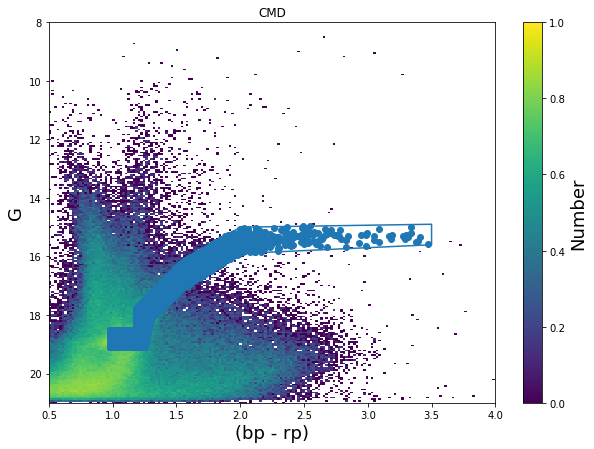

In [104]:
# Verify the CMD cut on Gaia query data worked

plt.figure(figsize=(10,7))


plt.hist2d(good_catalog10_53['phot_bp_mean_mag'] - good_catalog10_53['phot_rp_mean_mag'], 
          good_catalog10_53['phot_g_mean_mag'], range=None, bins=250, cmap='viridis', norm=LogNorm(), cmin=1)

plt.scatter(RGB_CMD_cut['phot_bp_mean_mag'] - RGB_CMD_cut['phot_rp_mean_mag'], 
          RGB_CMD_cut['phot_g_mean_mag'])


plt.plot(xcut3, ycut3)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('(bp - rp)', fontsize=18)
plt.ylabel('G', fontsize=18)
plt.xlim(0.5,4)
plt.ylim(8,21)
plt.gca().invert_yaxis()

# x_vals = ([0.95,0.95], [0.95, 1.275], [1.275, 1.275], [1.275, 1.6], [1.6, 2], [2, 3.5], 
#           [3.5, 3.5], [3.5, 2], [2, 1.5], [1.5, 1.125], [1.125, 1.125], [1.125, 0.95] )
# y_vals = ([18.5, 19.25], [19.25, 19.25], [19.25, 18.5], [18.5, 17], [17, 16], [16, 15.5],
#           [15.5, 14.75], [14.75, 14.75], [14.75, 15.9], [15.9, 17.8], [17.8, 18.5], [18.5, 18.5] )

# plt.plot(x_vals, y_vals, "BLACK")

# plt.plot([1.25,1.25], [12.5,14.5],"BLACK", [1.25,1.45], [14.5,14.5], "BLACK",
#         [1.45,1.6], [14.5,13], "BLACK", [1.6,1.8], [13,12.75], "BLACK", [1.8,3], [12.75,12.75], "BLACK", 
#         [3,3], [12.75,11], "BLACK", [3,1.7], [11,11], "BLACK", [1.7,1.25], [11,12.5], "BLACK" )

# coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
# coord.append(coord[0]) #repeat the first point to create a 'closed loop'

# xs, ys = zip(*coord) #create lists of x and y values

# plt.figure()
# plt.plot(xs,ys) 
plt.title("CMD")
cbar.set_label('Number', fontsize=18)
plt.show()

# All cuts on MAPS data

# Spatial Cut on MAPS catalog to only include LMC stars

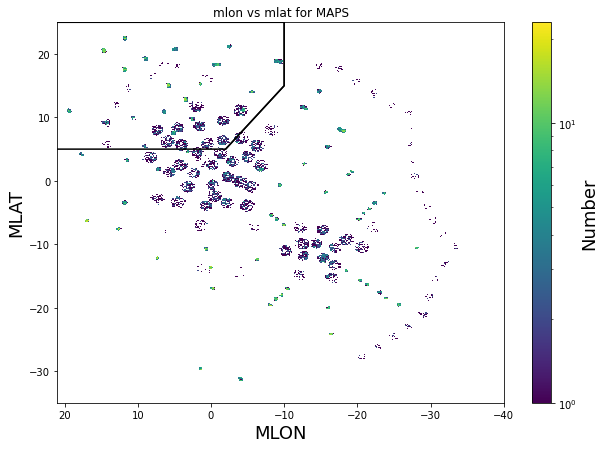

In [105]:
plt.figure(figsize=(10,7))


plt.hist2d(lmc_maps_catalog['MLON'],lmc_maps_catalog['MLAT'],
           range=None, bins=600, cmap='viridis', norm=LogNorm(), cmin=1)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('MLON', fontsize=18)
plt.ylabel('MLAT', fontsize=18)
plt.xlim(21,-40)
plt.ylim(25,-35)

plt.gca().invert_yaxis()

x_vals = ([22, -2], [-2,-10], [-10,-10], [-10,22], [22,22])

y_vals = ([5, 5], [5,15], [15,25], [25,25], [25,5])

plt.plot(x_vals, y_vals, "BLACK")

plt.title("mlon vs mlat for MAPS")
cbar.set_label('Number', fontsize=18)
plt.show()

In [106]:
from dlnpyutils import utils as dln
xcut = [22,-2,-2,-10,-10,-10,-10,22,22,22]
ycut = [5,5,5,15,15,25,25,25,25,5]
xdata = lmc_maps_catalog['MLON']
ydata = lmc_maps_catalog['MLAT']
ind, cutind = dln.roi_cut(xcut, ycut, xdata.data, ydata.data)

In [107]:
maps_catalog_spatialcut = lmc_maps_catalog[cutind]
leftover_SMC = lmc_maps_catalog[ind]
print(len(maps_catalog_spatialcut))
print(len(leftover_SMC))
print(len(cutind))
print(len(ind))

4520
11815
4520
11815


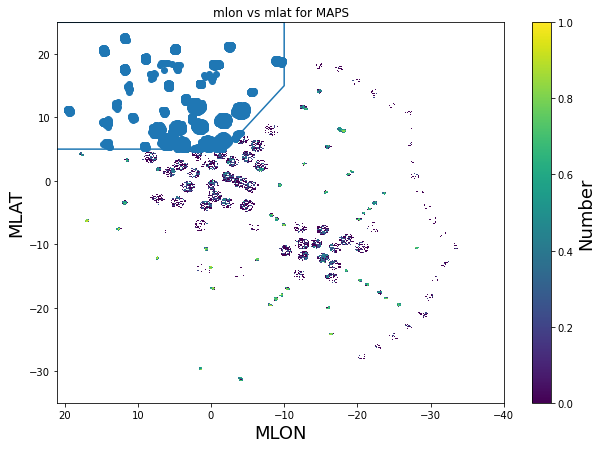

In [108]:
# Verify Spatial Cut worked

plt.figure(figsize=(10,7))


plt.hist2d(lmc_maps_catalog['MLON'],lmc_maps_catalog['MLAT'],
           range=None, bins=600, cmap='viridis', norm=LogNorm(), cmin=1)

plt.scatter(maps_catalog_spatialcut['MLON'], maps_catalog_spatialcut['MLAT'])

plt.plot(xcut,ycut)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('MLON', fontsize=18)
plt.ylabel('MLAT', fontsize=18)
plt.xlim(21,-40)
plt.ylim(25,-35)

plt.gca().invert_yaxis()

# x_vals = ([22, -2], [-2,-10], [-10,-10], [-10,22], [22,22])

# y_vals = ([5, 5], [5,15], [15,25], [25,25], [25,5])

# plt.plot(x_vals, y_vals, "BLACK")

plt.title("mlon vs mlat for MAPS")
cbar.set_label('Number', fontsize=18)
plt.show()

# CMD cut on MAPS

In [109]:
pmdist_cut_maps = np.sqrt((maps_catalog_spatialcut['PMML']-1.70)**2 + (maps_catalog_spatialcut['PMMB'] - 0.1)**2)

no_nan_maps = maps_catalog_spatialcut[np.where((pmdist_cut_maps < 1.6) & 
                                                    np.isfinite(maps_catalog_spatialcut['BP']) & 
                                                    np.isfinite(maps_catalog_spatialcut['RP']) & 
                                                    np.isfinite(maps_catalog_spatialcut['GMAG']) & 
                                                    np.isfinite(maps_catalog_spatialcut['M']) & 
                                                    np.isfinite(maps_catalog_spatialcut['T2']) & 
                                                    np.isfinite(maps_catalog_spatialcut['DDO51']))]

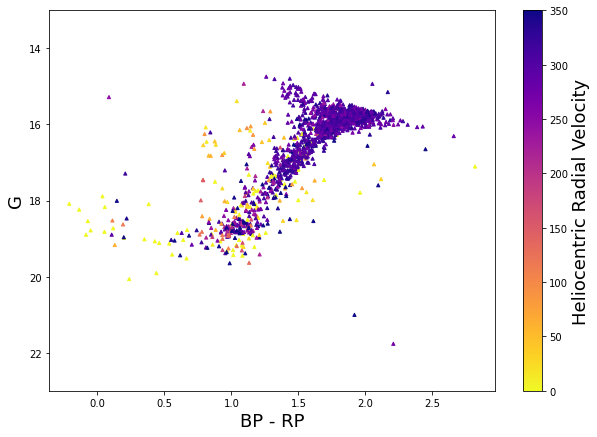

In [110]:
plt.figure(figsize=(10,7))
VHELIO = no_nan_maps['VHELIO']

c = plt.scatter(no_nan_maps['BP'] - no_nan_maps['RP'], 
            no_nan_maps['GMAG'], marker='^', c=VHELIO, s=10, cmap='plasma_r', vmin=0, vmax=350)
cbar = plt.colorbar(c)
cbar.set_label('Heliocentric Radial Velocity', fontsize=18)

plt.xlabel('BP - RP', fontsize=18)
plt.ylabel('G', fontsize=18)
# plt.xlim(0.425, 1.8)
plt.ylim(23, 13)
plt.show()

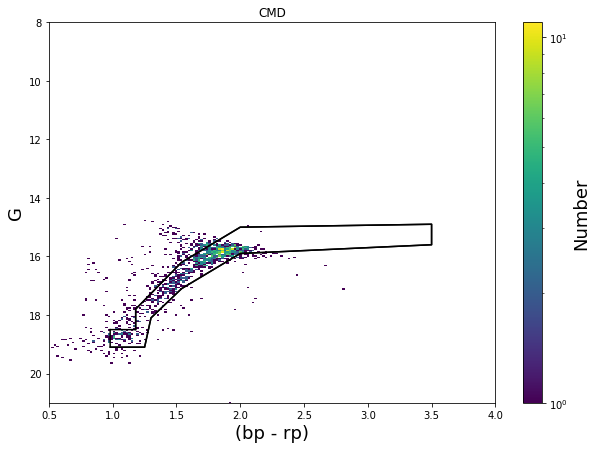

In [111]:
plt.figure(figsize=(10,7))


plt.hist2d(no_nan_maps['BP'] - no_nan_maps['RP'], 
          no_nan_maps['GMAG'], range=None, bins=150, cmap='viridis', norm=LogNorm(), cmin=1)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('(bp - rp)', fontsize=18)
plt.ylabel('G', fontsize=18)
plt.xlim(0.5,4)
plt.ylim(8,21)

plt.gca().invert_yaxis()

x_vals = ([0.98, 0.98], [0.98, 1.25], [1.25, 1.3], [1.3, 1.54], [1.54, 2], [2, 3.5], 
          [3.5, 3.5], [3.5, 2], [2, 1.54], [1.54, 1.18], [1.18, 1.18], [1.18, 0.98])

y_vals = ([18.5, 19.1], [19.1, 19.1], [19.1, 18.1], [18.1, 17.1], [17.1, 15.9], [15.9, 15.6],
          [15.6, 14.9], [14.9, 15], [15, 16.2], [16.2, 17.8], [17.8, 18.5], [18.5, 18.5])

plt.plot(x_vals, y_vals, "BLACK")

# plt.plot([1.25,1.25], [12.5,14.5],"BLACK", [1.25,1.45], [14.5,14.5], "BLACK",
#         [1.45,1.6], [14.5,13], "BLACK", [1.6,1.8], [13,12.75], "BLACK", [1.8,3], [12.75,12.75], "BLACK", 
#         [3,3], [12.75,11], "BLACK", [3,1.7], [11,11], "BLACK", [1.7,1.25], [11,12.5], "BLACK" )

# coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
# coord.append(coord[0]) #repeat the first point to create a 'closed loop'

# xs, ys = zip(*coord) #create lists of x and y values

# plt.figure()
# plt.plot(xs,ys) 
plt.title("CMD")
cbar.set_label('Number', fontsize=18)
plt.show()

In [112]:
xcut6 = [0.98, 0.98, 1.25, 1.30, 1.54, 2.0, 3.5, 3.5, 3.5, 2, 1.54, 1.18, 1.18, 0.98]
ycut6 = [18.5, 19.1, 19.1, 18.1, 17.1, 15.9, 15.6, 14.9, 14.9, 15, 16.2, 17.8, 18.5, 18.5]
xdata6 = (no_nan_maps['BP']
         - no_nan_maps['RP'])
ydata6 = no_nan_maps['GMAG']
ind6, cutind6 = dln.roi_cut(xcut6, ycut6, xdata6.data, ydata6.data)

In [113]:
RGB_CMD_cut_maps = no_nan_maps[cutind6]
leftover_foreground6 = no_nan_maps[ind6]
print(len(RGB_CMD_cut_maps))
print(len(leftover_foreground6))
print(len(cutind6))
print(len(ind6))

1022
452
1022
452


# PM and RV cut on MAPS

In [114]:
good_maps_catalog = RGB_CMD_cut_maps[np.where((RGB_CMD_cut_maps["VHELIO"] > 150) & (RGB_CMD_cut_maps["VHELIO"] < 500) & (RGB_CMD_cut_maps["GMAG"] < 50))]


In [115]:
# Verify that pmdist cut worked
print(np.max(good_maps_catalog["PMML"]) - np.min(good_maps_catalog["PMML"]))

1.3911846


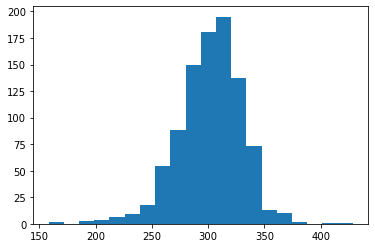

In [116]:
# verify RV cut worked
plt.hist(good_maps_catalog["VHELIO"], bins=20)
plt.show()

# All cuts on SDSSV data

# Spatail cut on SDSSV

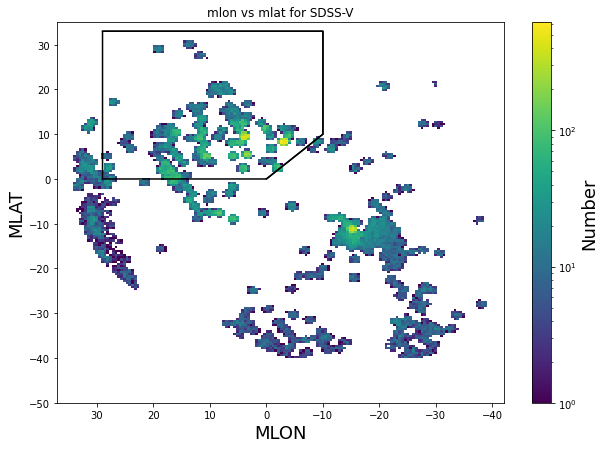

In [117]:
plt.figure(figsize=(10,7))


plt.hist2d(lmc_sdssv_catalog['mlon'],lmc_sdssv_catalog['mlat'],
           range=None, bins=150, cmap='viridis', norm=LogNorm(), cmin=1)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('MLON', fontsize=18)
plt.ylabel('MLAT', fontsize=18)
plt.xlim(37,-42)
plt.ylim(-50,35)

# plt.gca().invert_yaxis()

x_vals = ([29, 0], [0,-10], [-10,-10], [-10,29], [29,29])

y_vals = ([0, 0], [0,10], [10,33], [33,33], [33,0])

plt.plot(x_vals, y_vals, "BLACK")

plt.title("mlon vs mlat for SDSS-V")
cbar.set_label('Number', fontsize=18)
plt.show()

In [118]:
from dlnpyutils import utils as dln
xcut2 = [29,0,0,-10,-10,-10,-10,29,29,29]
ycut2 = [0,0,0,10,10,33,33,33,33,0]
xdata2 = lmc_sdssv_catalog['mlon']
ydata2 = lmc_sdssv_catalog['mlat']
ind2, cutind2 = dln.roi_cut(xcut2, ycut2, xdata2.data, ydata2.data)

In [119]:
sdssv_catalog_spatialcut = lmc_sdssv_catalog[cutind2]
leftover_sdssv_SMC = lmc_sdssv_catalog[ind2]
print(len(sdssv_catalog_spatialcut))
print(len(leftover_sdssv_SMC))
print(len(cutind2))
print(len(ind2))

34483
31163
34483
31163


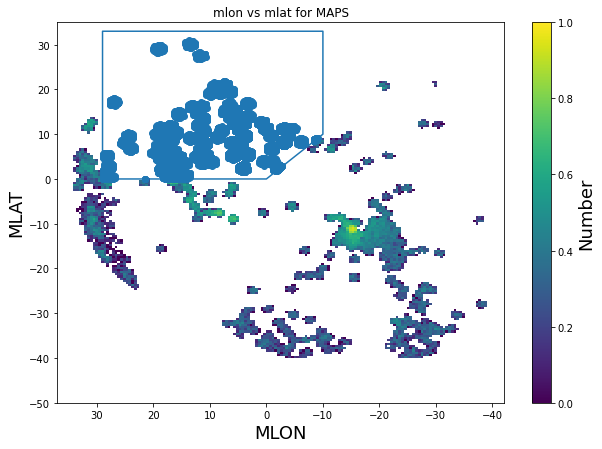

In [120]:
# Verify spatial cut worked

plt.figure(figsize=(10,7))


plt.hist2d(lmc_sdssv_catalog['mlon'],lmc_sdssv_catalog['mlat'],
           range=None, bins=150, cmap='viridis', norm=LogNorm(), cmin=1)

plt.scatter(sdssv_catalog_spatialcut['mlon'], sdssv_catalog_spatialcut['mlat'])

plt.plot(xcut2,ycut2)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('MLON', fontsize=18)
plt.ylabel('MLAT', fontsize=18)
plt.xlim(37,-42)
plt.ylim(-50,35)

# plt.gca().invert_yaxis()

# x_vals = ([22, -2], [-2,-10], [-10,-10], [-10,22], [22,22])

# y_vals = ([5, 5], [5,15], [15,25], [25,25], [25,5])

# plt.plot(x_vals, y_vals, "BLACK")

plt.title("mlon vs mlat for MAPS")
cbar.set_label('Number', fontsize=18)
plt.show()

# CMD and PM cut on SDSSV

In [121]:
pmdist_cut_sdssv = np.sqrt((sdssv_catalog_spatialcut['pmml']-1.70)**2 + (sdssv_catalog_spatialcut['pmmb'] - 0.1)**2)

no_nan_sdssv = sdssv_catalog_spatialcut[np.where((pmdist_cut_sdssv < 1.6) & 
                                                     np.isfinite(sdssv_catalog_spatialcut['GAIA_BP']) & 
                                                     np.isfinite(sdssv_catalog_spatialcut['GAIA_RP']) & 
                                                     np.isfinite(sdssv_catalog_spatialcut['GAIA_G']))]

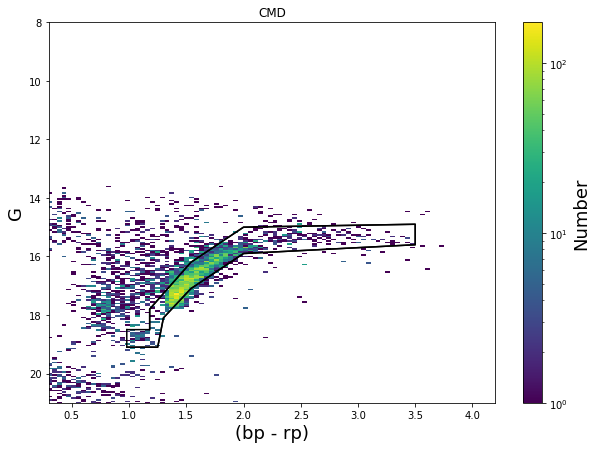

In [122]:
plt.figure(figsize=(10,7))


plt.hist2d(no_nan_sdssv['GAIA_BP'] - no_nan_sdssv['GAIA_RP'], 
          no_nan_sdssv['GAIA_G'], range=None, bins=150, cmap='viridis', norm=LogNorm(), cmin=1)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('(bp - rp)', fontsize=18)
plt.ylabel('G', fontsize=18)
plt.xlim(0.3,4.2)
plt.ylim(8,21)

plt.gca().invert_yaxis()

x_vals = ([0.98, 0.98], [0.98, 1.25], [1.25, 1.3], [1.3, 1.54], [1.54, 2], [2, 3.5], 
          [3.5, 3.5], [3.5, 2], [2, 1.54], [1.54, 1.18], [1.18, 1.18], [1.18, 0.98])

y_vals = ([18.5, 19.1], [19.1, 19.1], [19.1, 18.1], [18.1, 17.1], [17.1, 15.9], [15.9, 15.6],
          [15.6, 14.9], [14.9, 15], [15, 16.2], [16.2, 17.8], [17.8, 18.5], [18.5, 18.5])

plt.plot(x_vals, y_vals, "BLACK")

# plt.plot([1.25,1.25], [12.5,14.5],"BLACK", [1.25,1.45], [14.5,14.5], "BLACK",
#         [1.45,1.6], [14.5,13], "BLACK", [1.6,1.8], [13,12.75], "BLACK", [1.8,3], [12.75,12.75], "BLACK", 
#         [3,3], [12.75,11], "BLACK", [3,1.7], [11,11], "BLACK", [1.7,1.25], [11,12.5], "BLACK" )

# coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
# coord.append(coord[0]) #repeat the first point to create a 'closed loop'

# xs, ys = zip(*coord) #create lists of x and y values

# plt.figure()
# plt.plot(xs,ys) 
plt.title("CMD")
cbar.set_label('Number', fontsize=18)
plt.show()

In [123]:
xcut5 = [0.98, 0.98, 1.25, 1.30, 1.54, 2.0, 3.5, 3.5, 3.5, 2, 1.54, 1.18, 1.18, 0.98]
ycut5 = [18.5, 19.1, 19.1, 18.1, 17.1, 15.9, 15.6, 14.9, 14.9, 15, 16.2, 17.8, 18.5, 18.5]
xdata5 = (no_nan_sdssv['GAIA_BP']
         - no_nan_sdssv['GAIA_RP'])
ydata5 = no_nan_sdssv['GAIA_G']
ind5, cutind5 = dln.roi_cut(xcut5, ycut5, xdata5.data, ydata5.data)

In [124]:
RGB_CMD_cut_sdssv = no_nan_sdssv[cutind5]
leftover_foreground5 = no_nan_sdssv[ind5]
print(len(RGB_CMD_cut_sdssv))
print(len(leftover_foreground5))
print(len(cutind5))
print(len(ind5))

9699
4710
9699
4710


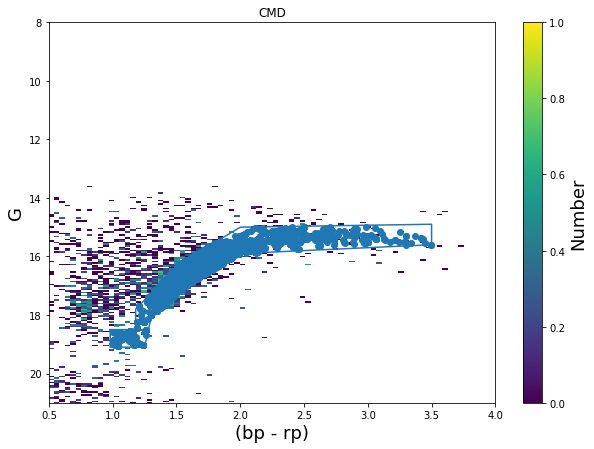

In [125]:
# Verify the CMD cut on Gaia query data worked

plt.figure(figsize=(10,7))


plt.hist2d(no_nan_sdssv['GAIA_BP'] - no_nan_sdssv['GAIA_RP'], 
          no_nan_sdssv['GAIA_G'], range=None, bins=150, cmap='viridis', norm=LogNorm(), cmin=1)

plt.scatter(RGB_CMD_cut_sdssv['GAIA_BP'] - RGB_CMD_cut_sdssv['GAIA_RP'], 
          RGB_CMD_cut_sdssv['GAIA_G'])


plt.plot(xcut5, ycut5)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('(bp - rp)', fontsize=18)
plt.ylabel('G', fontsize=18)
plt.xlim(0.5,4)
plt.ylim(8,21)
plt.gca().invert_yaxis()

# x_vals = ([0.95,0.95], [0.95, 1.275], [1.275, 1.275], [1.275, 1.6], [1.6, 2], [2, 3.5], 
#           [3.5, 3.5], [3.5, 2], [2, 1.5], [1.5, 1.125], [1.125, 1.125], [1.125, 0.95] )
# y_vals = ([18.5, 19.25], [19.25, 19.25], [19.25, 18.5], [18.5, 17], [17, 16], [16, 15.5],
#           [15.5, 14.75], [14.75, 14.75], [14.75, 15.9], [15.9, 17.8], [17.8, 18.5], [18.5, 18.5] )

# plt.plot(x_vals, y_vals, "BLACK")

# plt.plot([1.25,1.25], [12.5,14.5],"BLACK", [1.25,1.45], [14.5,14.5], "BLACK",
#         [1.45,1.6], [14.5,13], "BLACK", [1.6,1.8], [13,12.75], "BLACK", [1.8,3], [12.75,12.75], "BLACK", 
#         [3,3], [12.75,11], "BLACK", [3,1.7], [11,11], "BLACK", [1.7,1.25], [11,12.5], "BLACK" )

# coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
# coord.append(coord[0]) #repeat the first point to create a 'closed loop'

# xs, ys = zip(*coord) #create lists of x and y values

# plt.figure()
# plt.plot(xs,ys) 
plt.title("CMD")
cbar.set_label('Number', fontsize=18)
plt.show()

# RV cut on SDSSV

In [126]:
good_sdssv_catalog = RGB_CMD_cut_sdssv[np.where((RGB_CMD_cut_sdssv["XCSAO_RV"] > 150) & (RGB_CMD_cut_sdssv["XCSAO_RV"] < 500))]


In [127]:
# verify pmdist cut worked
print(np.max(good_sdssv_catalog["pmml"]) - np.min(good_sdssv_catalog["pmml"]))

2.7364565396803218


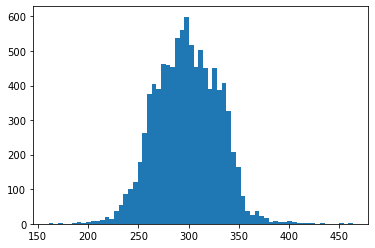

In [128]:
# verify RV cut worked
plt.hist(good_sdssv_catalog["XCSAO_RV"], bins=65)
plt.show()

# All cuts on APOGEE data

# Spatial Cut on APOGEE data

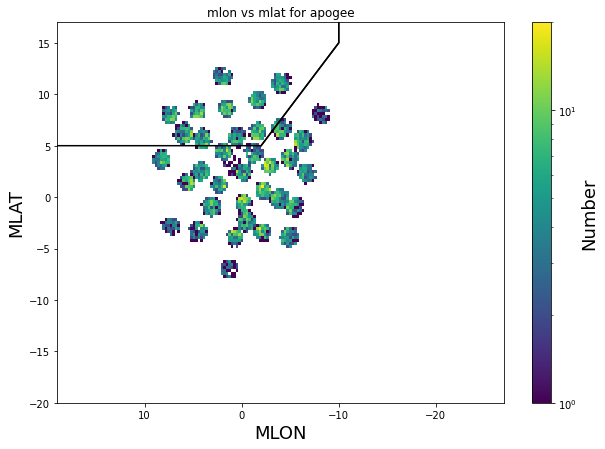

In [129]:
plt.figure(figsize=(10,7))


plt.hist2d(lmc_apogee_catalog['MLON'],lmc_apogee_catalog['MLAT'],
           range=None, bins=70, cmap='viridis', norm=LogNorm(), cmin=1)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('MLON', fontsize=18)
plt.ylabel('MLAT', fontsize=18)
plt.xlim(19,-27)
plt.ylim(17,-20)

plt.gca().invert_yaxis()

x_vals = ([22, -2], [-2,-10], [-10,-10], [-10,22], [22,22])

y_vals = ([5, 5], [5,15], [15,25], [25,25], [25,5])

plt.plot(x_vals, y_vals, "BLACK")

plt.title("mlon vs mlat for apogee")
cbar.set_label('Number', fontsize=18)
plt.show()

In [130]:
from dlnpyutils import utils as dln
xcut4 = [22,-2,-2,-10,-10,-10,-10,22,22,22]
ycut4 = [5,5,5,15,15,25,25,25,25,5]
xdata4 = lmc_apogee_catalog['MLON']
ydata4 = lmc_apogee_catalog['MLAT']
ind4, cutind4 = dln.roi_cut(xcut4, ycut4, xdata4.data, ydata4.data)

In [131]:
apogee_catalog_spatialcut = lmc_apogee_catalog[cutind4]
leftover_apogee = lmc_apogee_catalog[ind4]
print(len(apogee_catalog_spatialcut))
print(len(leftover_apogee))
print(len(cutind4))
print(len(ind4))

1822
4308
1822
4308


# CMD cut on apogee data

In [132]:
pmdist_cut_apogee = np.sqrt((apogee_catalog_spatialcut['GAIAEDR3_PMML']-1.70)**2 + (apogee_catalog_spatialcut['GAIAEDR3_PMMB'] - 0.1)**2)

no_nan_apogee = apogee_catalog_spatialcut[np.where((pmdist_cut_apogee < 1.6) & 
                                                    np.isfinite(apogee_catalog_spatialcut['GAIAEDR3_BPMAG']) & 
                                                    np.isfinite(apogee_catalog_spatialcut['GAIAEDR3_RPMAG']) & 
                                                    np.isfinite(apogee_catalog_spatialcut['GAIAEDR3_GMAG']))]

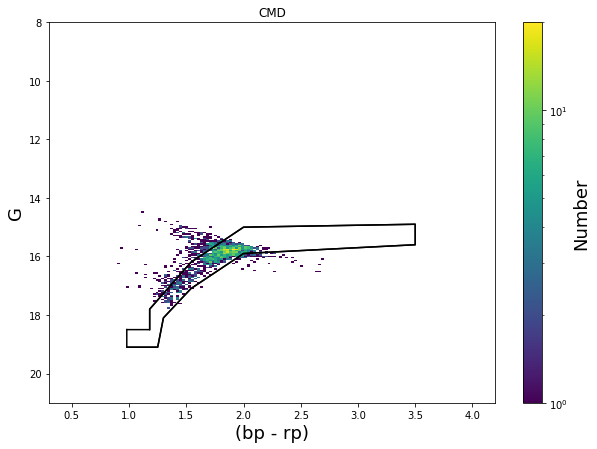

In [133]:
plt.figure(figsize=(10,7))


plt.hist2d(no_nan_apogee['GAIAEDR3_BPMAG'] - no_nan_apogee['GAIAEDR3_RPMAG'], 
          no_nan_apogee['GAIAEDR3_GMAG'], range=None, bins=70, cmap='viridis', norm=LogNorm(), cmin=1)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('(bp - rp)', fontsize=18)
plt.ylabel('G', fontsize=18)
plt.xlim(0.3,4.2)
plt.ylim(8,21)

plt.gca().invert_yaxis()

x_vals = ([0.98, 0.98], [0.98, 1.25], [1.25, 1.3], [1.3, 1.54], [1.54, 2], [2, 3.5], 
          [3.5, 3.5], [3.5, 2], [2, 1.54], [1.54, 1.18], [1.18, 1.18], [1.18, 0.98])

y_vals = ([18.5, 19.1], [19.1, 19.1], [19.1, 18.1], [18.1, 17.1], [17.1, 15.9], [15.9, 15.6],
          [15.6, 14.9], [14.9, 15], [15, 16.2], [16.2, 17.8], [17.8, 18.5], [18.5, 18.5])

plt.plot(x_vals, y_vals, "BLACK")

# plt.plot([1.25,1.25], [12.5,14.5],"BLACK", [1.25,1.45], [14.5,14.5], "BLACK",
#         [1.45,1.6], [14.5,13], "BLACK", [1.6,1.8], [13,12.75], "BLACK", [1.8,3], [12.75,12.75], "BLACK", 
#         [3,3], [12.75,11], "BLACK", [3,1.7], [11,11], "BLACK", [1.7,1.25], [11,12.5], "BLACK" )

# coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
# coord.append(coord[0]) #repeat the first point to create a 'closed loop'

# xs, ys = zip(*coord) #create lists of x and y values

# plt.figure()
# plt.plot(xs,ys) 
plt.title("CMD")
cbar.set_label('Number', fontsize=18)
plt.show()

In [134]:
xcut7 = [0.98, 0.98, 1.25, 1.30, 1.54, 2.0, 3.5, 3.5, 3.5, 2, 1.54, 1.18, 1.18, 0.98]
ycut7 = [18.5, 19.1, 19.1, 18.1, 17.1, 15.9, 15.6, 14.9, 14.9, 15, 16.2, 17.8, 18.5, 18.5]
xdata7 = (no_nan_apogee['GAIAEDR3_BPMAG']
         - no_nan_apogee['GAIAEDR3_RPMAG'])
ydata7 = no_nan_apogee['GAIAEDR3_GMAG']
ind7, cutind7 = dln.roi_cut(xcut7, ycut7, xdata7.data, ydata7.data)

In [135]:
RGB_CMD_cut_apogee = no_nan_apogee[cutind7]
leftover_foreground7 = no_nan_apogee[ind7]
print(len(RGB_CMD_cut_apogee))
print(len(leftover_foreground7))
print(len(cutind7))
print(len(ind7))

1387
435
1387
435


# RV cut for APOGEE data

In [136]:
good_apogee_catalog = RGB_CMD_cut_apogee[np.where((RGB_CMD_cut_apogee["VHELIO_AVG"] > 150) & (RGB_CMD_cut_apogee["VHELIO_AVG"] < 500))]


In [137]:
# verify pmdist cut worked
print(np.max(good_apogee_catalog["GAIAEDR3_PMML"]) - np.min(good_apogee_catalog["GAIAEDR3_PMML"]))

1.3992934


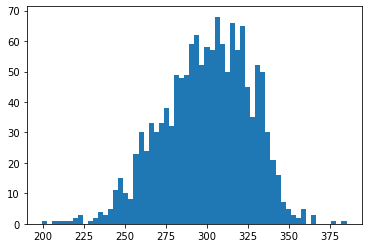

In [138]:
# verify RV cut worked
plt.hist(good_apogee_catalog["VHELIO_AVG"], bins=60)
plt.show()

In [60]:
# lmc_catalog['lmc_radius_correct'] = ((lmc_catalog['mlon'])**2 + (lmc_catalog['mlat'] - 2.3 )**2 )**(0.5)

In [62]:
# lmc_catalog.write('/Users/slaterjonesoden/Desktop/LMC_Periphery/lmc_distant_hydramike_gaiaedr3_extra.fits', overwrite = True)


# All cuts on HYDRA + MIKE data

# PM cut for HYDRA + MIKE

In [139]:
pmdist_cut_hydra_mike = np.sqrt((lmc_catalog['pmml']-1.70)**2 + (lmc_catalog['pmmb'] - 0.1)**2)
good_hydramike_catalog = lmc_catalog[np.where((pmdist_cut_hydra_mike < 1.6) & (lmc_catalog["VHELIO"] > 150) & (lmc_catalog["VHELIO"] < 500))]


In [140]:
# verify cut worked
print(np.max(good_hydramike_catalog["pmml"]) - np.min(good_hydramike_catalog["pmml"]))

2.423349851797193


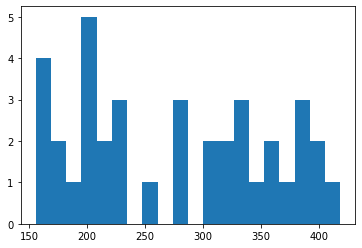

In [141]:
# verify RV cut worked
plt.hist(good_hydramike_catalog["VHELIO"], bins=20)
plt.show()

In [8]:
# good_lmc_catalog['lmc_radius'] = lmc_catalog['LMCRAD']
# good_lmc_catalog['pmra'] = lmc_catalog['GAIAEDR3_PMRA']
# good_lmc_catalog['pmdec'] = lmc_catalog['GAIAEDR3_PMDEC']
# good_lmc_catalog['pmml'] = lmc_catalog['GAIAEDR3_PMML']
# good_lmc_catalog['pmmb'] = lmc_catalog['GAIAEDR3_PMMB']
# good_lmc_catalog['pm'] = lmc_catalog['GAIAEDR3_Total_PM']

In [29]:
# good_lmc_catalog = lmc_catalog[np.where((pmdist < 0.7) &
#                                np.isfinite(lmc_catalog['M']) & 
#                               np.isfinite(lmc_catalog['T']) & 
#                               np.isfinite(lmc_catalog['D']) &
#                               np.isfinite(lmc_catalog['VHEL']) &
#                               np.isfinite(lmc_catalog['LMCRAD']) & 
#                               np.isfinite(lmc_catalog['GAIAEDR3_PMRA']) & 
#                               np.isfinite(lmc_catalog['GAIAEDR3_PMDEC']) & 
#                               np.isfinite(lmc_catalog['GAIAEDR3_BPMAG']) & 
#                               np.isfinite(lmc_catalog['GAIAEDR3_RPMAG']) & 
#                               np.isfinite(lmc_catalog['GAIAEDR3_GMAG']) & 
# #                               np.isfinite(lmc_catalog['VHELIO']) & 
#                               np.isfinite(lmc_catalog['GAIAEDR3_PML']))]

In [31]:
# good_lmc_catalog = lmc_catalog[np.where((pmdist < 0.7))]

In [196]:
print(len(good_gaia_catalog))

138


# Compare HydraMikeData and Gaia Query RGB/RC stars

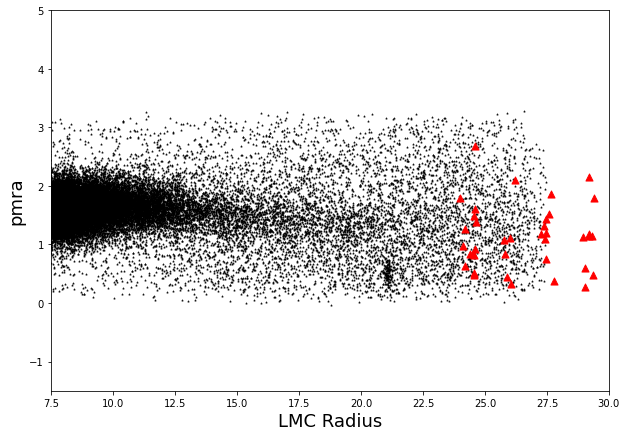

In [89]:
# plt.figure(figsize=(10,7))

# plt.scatter(good_gaia_catalog['lmc_radius_correct'], good_gaia_catalog['pmra'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
# plt.scatter(good_hydramike_catalog['lmc_radius_correct'], good_hydramike_catalog['pmra'], marker='^', s=50, color='red', linestyle='None', alpha=1 )
# plt.xlabel('LMC Radius', fontsize=18)
# plt.ylabel('pmra', fontsize=18)
# plt.ylim(-1.5,5)
# plt.xlim(7.5,30)
# plt.show()


plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmra'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
plt.scatter(good_hydramike_catalog['lmc_radius_correct'], good_hydramike_catalog['pmra'], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('LMC Radius', fontsize=18)
plt.ylabel('pmra', fontsize=18)
plt.ylim(-1.5,5)
plt.xlim(7.5,30)
plt.show()


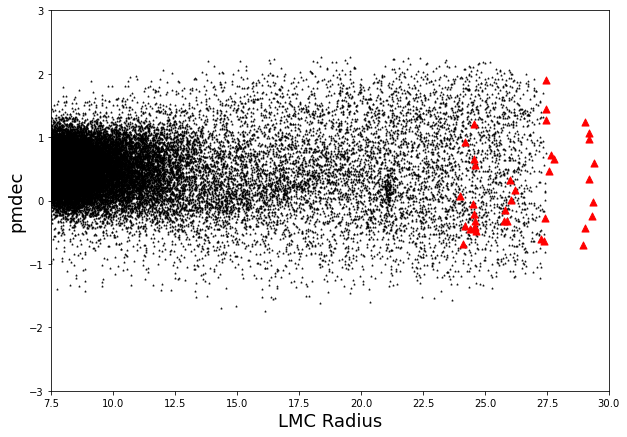

In [90]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmdec'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
plt.scatter(good_hydramike_catalog['lmc_radius_correct'], good_hydramike_catalog['pmdec'], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('LMC Radius', fontsize=18)
plt.ylabel( 'pmdec', fontsize=18)
plt.ylim(-3,3)
plt.xlim(7.5,30)
plt.show()

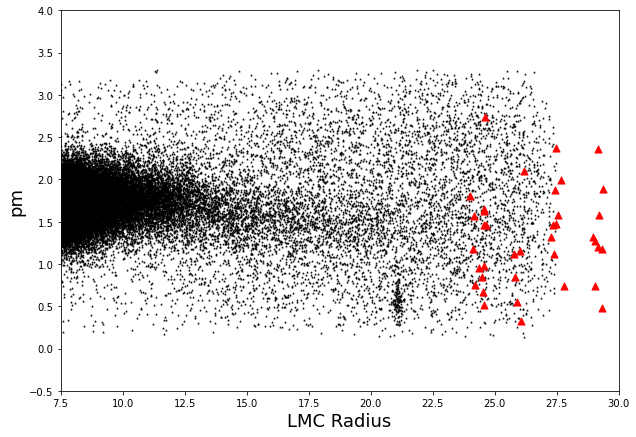

In [91]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pm'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
plt.scatter(good_hydramike_catalog['lmc_radius_correct'], good_hydramike_catalog['pm'], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('LMC Radius', fontsize=18)
plt.ylabel('pm', fontsize=18)
plt.ylim(-0.5,4)
plt.xlim(7.5,30)
plt.show()

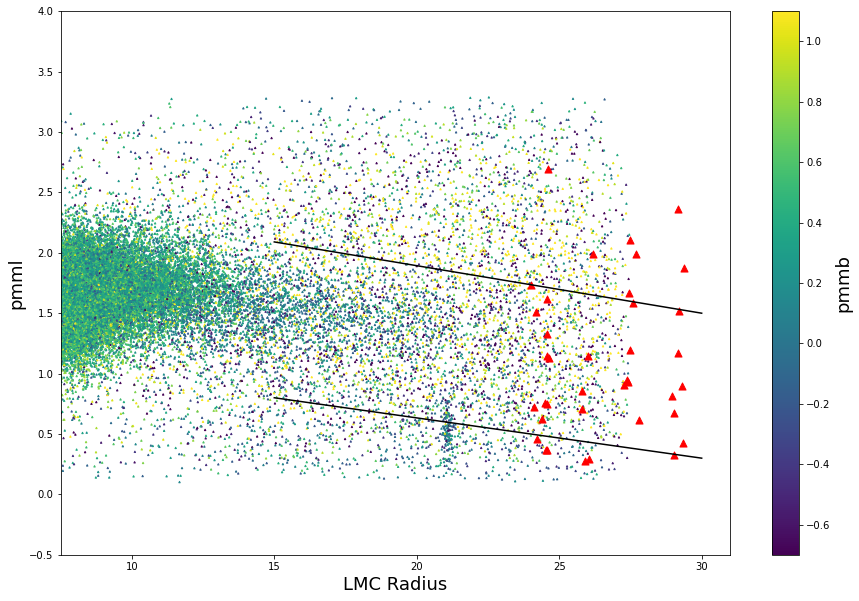

In [187]:
plt.figure(figsize=(15,10))

c = plt.scatter(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmml'],  marker='^', s=2, c=RGB_CMD_cut['pmmb'], cmap='viridis', linestyle='None', alpha=1, vmin=-0.7, vmax=1.1)


cbar = plt.colorbar(c)
cbar.set_label('pmmb', fontsize=18)

plt.scatter(good_hydramike_catalog['lmc_radius_correct'], good_hydramike_catalog['pmml'], marker='^', s=50, color='red', linestyle='None', alpha=1)


x_vals1 = ([15, 30])
y_vals1 = ([2.09, 1.5])
plt.plot(x_vals1, y_vals1, "BLACK")

x_vals2 = ([15, 30])
y_vals2 = ([0.8, 0.3])
plt.plot(x_vals2,y_vals2, "BLACK")

plt.xlabel('LMC Radius', fontsize=18)
plt.ylabel('pmml', fontsize=18)
plt.ylim(-0.5,4)
plt.xlim(7.5,31)
plt.show()


# plt.figure(figsize=(10,7))

# plt.scatter(good_gaia_catalog['lmc_radius_correct'], good_gaia_catalog['pmml'], marker='^', s=10, c=good_gaia_catalog['pmml'], linestyle='None', alpha=1)
# plt.colorbar()

# plt.scatter(good_hydramike_catalog['lmc_radius_correct'], good_hydramike_catalog['pmml'], marker='^', s=50, color='red', linestyle='None', alpha=1 )
# plt.xlabel('LMC Radius', fontsize=18)
# plt.ylim(0,4)
# plt.xlim(7.5,30)
# plt.ylabel( 'pmmb', fontsize=18)
# plt.show()



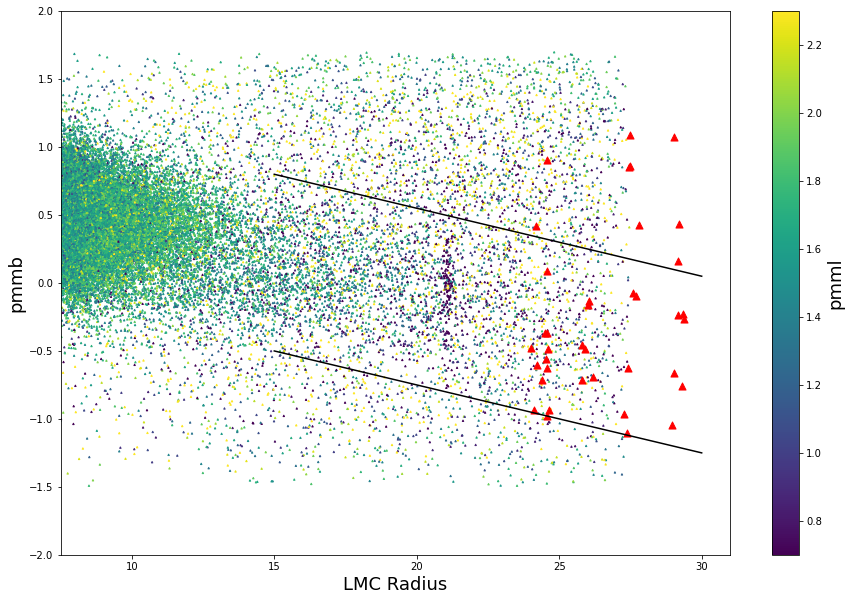

In [190]:
plt.figure(figsize=(15,10))

c = plt.scatter(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmmb'], marker='^', s=2, c=RGB_CMD_cut['pmml'], cmap='viridis', linestyle='None', alpha=1, vmin=0.7, vmax=2.3)


cbar = plt.colorbar(c)
cbar.set_label('pmml', fontsize=18)

plt.scatter(good_hydramike_catalog['lmc_radius_correct'], good_hydramike_catalog['pmmb'], marker='^', s=50, color='red', linestyle='None', alpha=1)

x_vals3 = ([15, 30])
y_vals3 = ([0.8, 0.05])
plt.plot(x_vals3, y_vals3, "BLACK")

x_vals4 = ([15, 30])
y_vals4 = ([-0.5, -1.25])
plt.plot(x_vals4,y_vals4, "BLACK")

plt.xlabel('LMC Radius', fontsize=18)
plt.xlim(7.5,31)
plt.ylim(-2,2)
plt.ylabel( 'pmmb', fontsize=18)
plt.show()


# plt.figure(figsize=(10,7))

# plt.scatter(good_gaia_catalog['lmc_radius_correct'], good_gaia_catalog['pmmb'], marker='^', s=10, c=good_gaia_catalog['pmml'], linestyle='None', alpha=1)
# plt.colorbar()

# plt.scatter(good_hydramike_catalog['lmc_radius_correct'], good_hydramike_catalog['pmmb'], marker='^', s=50, color='red', linestyle='None', alpha=1 )
# plt.xlabel('LMC Radius', fontsize=18)
# plt.ylim(-2.5,2.5)
# plt.ylabel( 'pmmb', fontsize=18)
# plt.show()

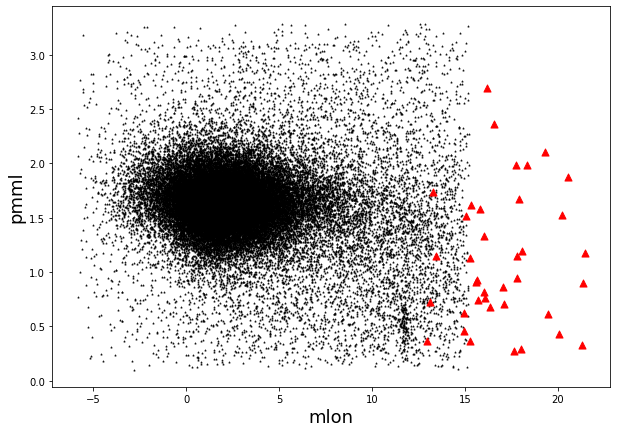

In [97]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
plt.scatter(good_hydramike_catalog['mlon'], good_hydramike_catalog['pmml'], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('mlon', fontsize=18)
plt.ylabel( 'pmml', fontsize=18)
plt.show()


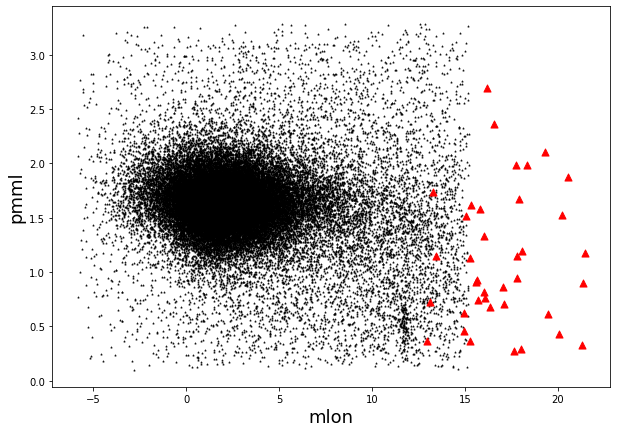

In [98]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
plt.scatter(good_hydramike_catalog['mlon'], good_hydramike_catalog['pmml'], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmml', fontsize=18)
plt.show()

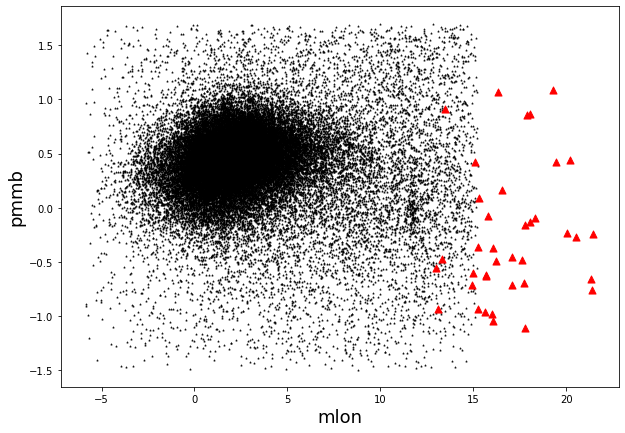

In [99]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmmb'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
plt.scatter(good_hydramike_catalog['mlon'], good_hydramike_catalog['pmmb'], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
plt.show()

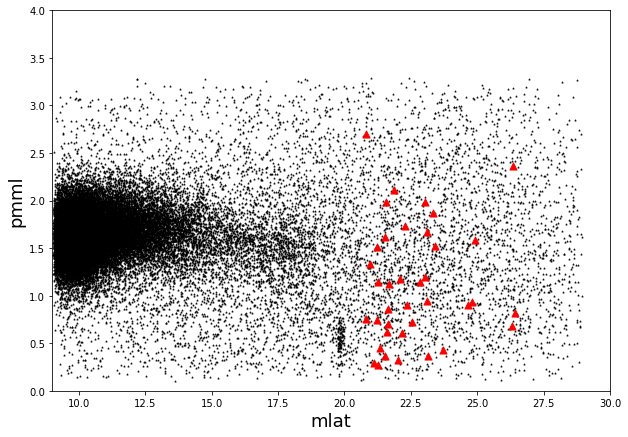

In [100]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
plt.scatter(good_hydramike_catalog['mlat'], good_hydramike_catalog['pmml'], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmml', fontsize=18)
plt.xlim(9,30)
plt.ylim(0,4)
plt.show()

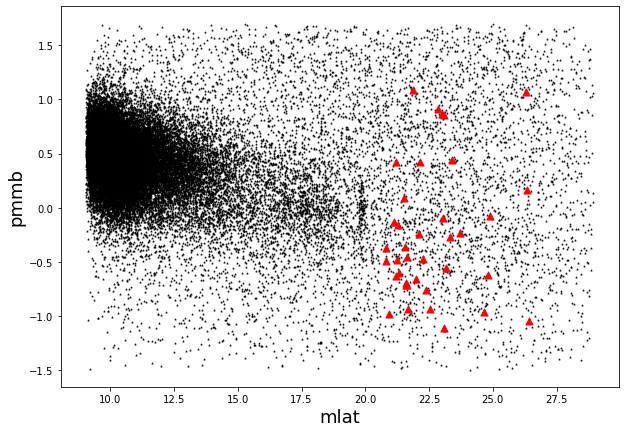

In [101]:
plt.figure(figsize=(10,7))

plt.scatter(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb'],  marker='^', s=1, color='black', linestyle='None', alpha=1)
plt.scatter(good_hydramike_catalog['mlat'], good_hydramike_catalog['pmmb'], marker='^', s=50, color='red', linestyle='None', alpha=1 )
plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
plt.show()

# RV vs LMC radius (comparing apogee data and Hydra Mike data)

# RV vs LMC radius (comparing apogee data, sdssv data, MAPS data and Hydra Mike data)

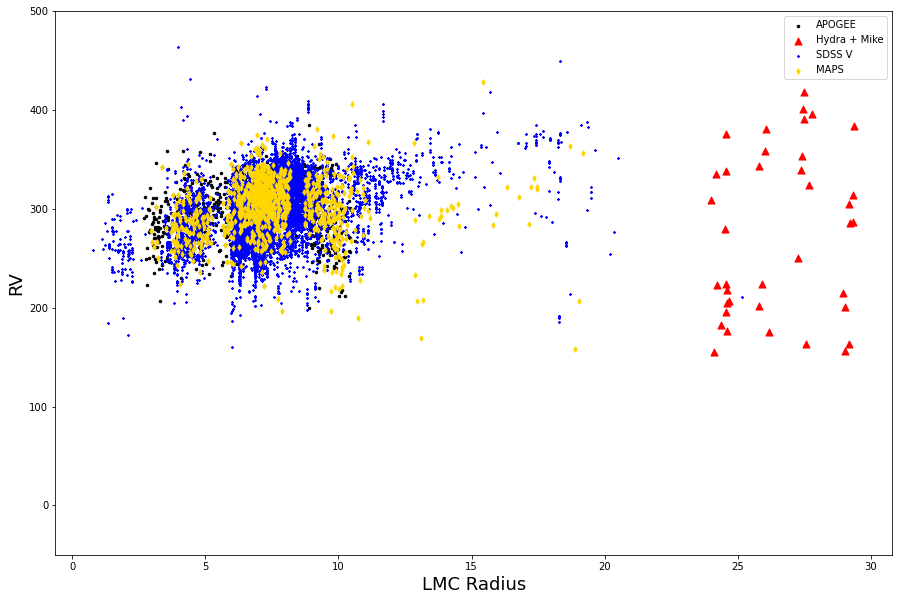

In [186]:
plt.figure(figsize=(15,10))

plt.scatter(good_apogee_catalog['LMCRAD'], good_apogee_catalog['VHELIO_AVG'],  marker='.', s=25, color='black', linestyle='None', alpha=1, label = "APOGEE")
plt.scatter(good_hydramike_catalog['lmc_radius_correct'], good_hydramike_catalog['VHELIO'], marker='^', s=50, color='red', linestyle='None', alpha=1, label = "Hydra + Mike")
plt.scatter(good_sdssv_catalog['lmc_radius_correct'], good_sdssv_catalog['XCSAO_RV'], marker='x', s=3, color='blue', linestyle='None', alpha=1, label = "SDSS V")
plt.scatter(good_maps_catalog['LMCRAD'], good_maps_catalog['VHELIO'], marker='d', s=15, color='gold', linestyle='None', alpha=1, label = "MAPS")

plt.xlabel('LMC Radius', fontsize=18)
plt.ylabel('RV', fontsize=18)
plt.ylim(-50, 500)
plt.legend()
plt.show()


# plt.figure(figsize=(12,9))

# plt.scatter(apogee_catalog_spatialcut['LMCRAD'], apogee_catalog_spatialcut['VHELIO_AVG'],  marker='^', s=5, color='black', linestyle='None', alpha=1, label = "APOGEE")
# plt.scatter(lmc_catalog['lmc_radius_correct'], lmc_catalog['VHELIO'], marker='^', s=50, color='red', linestyle='None', alpha=1, label = "Hydra + Mike")
# plt.scatter(sdssv_catalog_spatialcut['lmc_radius_correct'], sdssv_catalog_spatialcut['XCSAO_RV'], marker='^', s=1, color='blue', linestyle='None', alpha=1, label = "SDSS V")
# plt.scatter(maps_catalog_spatialcut['LMCRAD'], maps_catalog_spatialcut['VHELIO'], marker='^', s=0.1, color='gray', linestyle='None', alpha=1, label = "MAPS")

# plt.xlabel('LMC Radius', fontsize=18)
# plt.ylabel('RV', fontsize=18)
# plt.ylim(-50, 500)
# plt.legend()
# plt.show()

# RV vs LMC radius color coded by Position Angle (PA)

In [144]:
pa_hydramike = np.rad2deg(np.arctan2(good_hydramike_catalog['mlat']-2.33, good_hydramike_catalog['mlon']))
pa_apogee = np.rad2deg(np.arctan2(good_apogee_catalog['MLAT']-2.33, good_apogee_catalog['MLON']))
pa_sdssv = np.rad2deg(np.arctan2(good_sdssv_catalog['mlon']-2.33, good_sdssv_catalog['mlat']))
pa_maps = np.rad2deg(np.arctan2(good_maps_catalog['MLAT']-2.33, good_maps_catalog['MLON']))

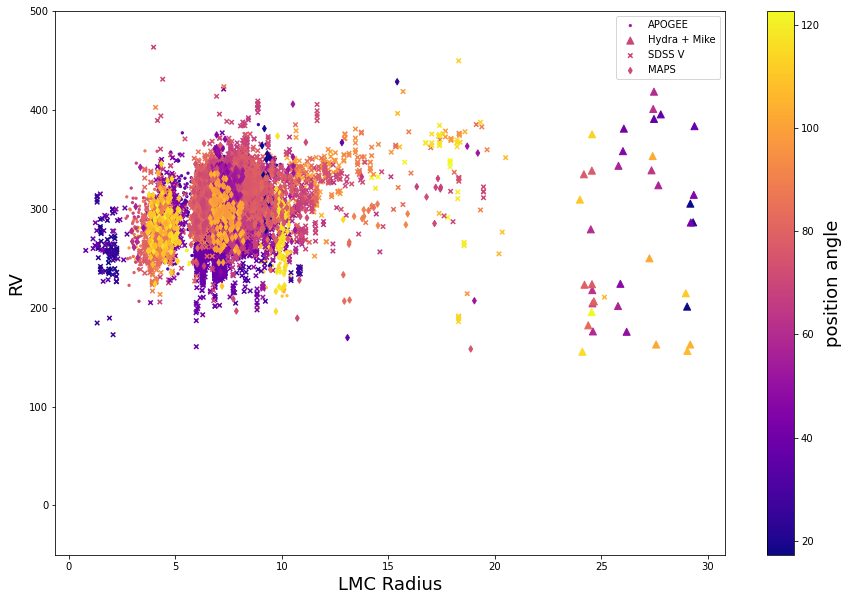

In [184]:
plt.figure(figsize=(15,10))

c = plt.scatter(good_apogee_catalog['LMCRAD'], good_apogee_catalog['VHELIO_AVG'],  marker='.', c= pa_apogee,s=20, cmap='plasma', linestyle='None', alpha=1, label = "APOGEE")
c = plt.scatter(good_hydramike_catalog['lmc_radius_correct'], good_hydramike_catalog['VHELIO'], marker='^', c= pa_hydramike, s=50, cmap='plasma', linestyle='None', alpha=1, label = "Hydra + Mike")
c = plt.scatter(good_sdssv_catalog['lmc_radius_correct'], good_sdssv_catalog['XCSAO_RV'], marker='x', c= pa_sdssv ,s=20, cmap='plasma', linestyle='None', alpha=1, label = "SDSS V")
c = plt.scatter(good_maps_catalog['LMCRAD'], good_maps_catalog['VHELIO'], marker='d', c= pa_maps, s=20, cmap='plasma', linestyle='None', alpha=1, label = "MAPS")

cbar1 = plt.colorbar(c)
cbar1.set_label('position angle', fontsize=18)
# cbar2 = plt.colorbar(b)
# cbar2.set_label('pa hydra', fontsize=18)
# cbar3 = plt.colorbar(c)
# cbar3.set_label('pa sdssv', fontsize=18)
# cbar4 = plt.colorbar(d)
# cbar4.set_label('pa maps', fontsize=18)

plt.xlabel('LMC Radius', fontsize=18)
plt.ylabel('RV', fontsize=18)
plt.ylim(-50, 500)
plt.legend()
plt.show()


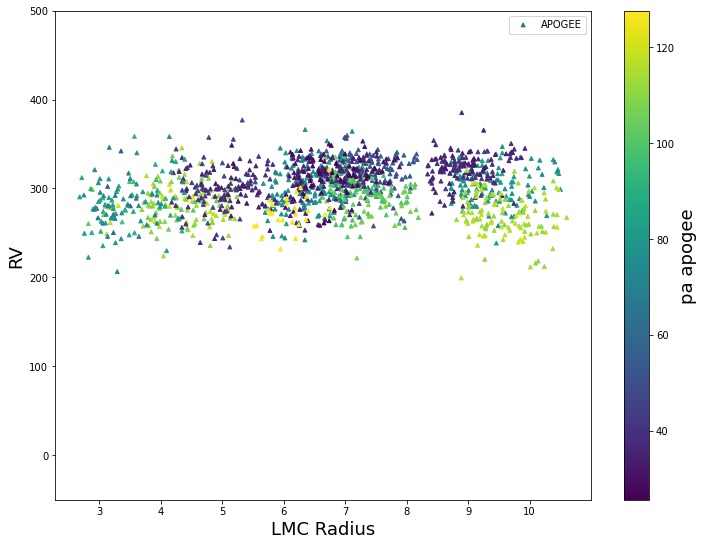

In [185]:
plt.figure(figsize=(12,9))

c = plt.scatter(good_apogee_catalog['LMCRAD'], good_apogee_catalog['VHELIO_AVG'],  marker='^', c= pa_apogee,s=15, cmap='viridis', linestyle='None', alpha=1, label = "APOGEE")
cbar = plt.colorbar(c)
cbar.set_label('pa apogee', fontsize=18)

plt.xlabel('LMC Radius', fontsize=18)
plt.ylabel('RV', fontsize=18)
plt.ylim(-50, 500)
plt.legend()
plt.show()

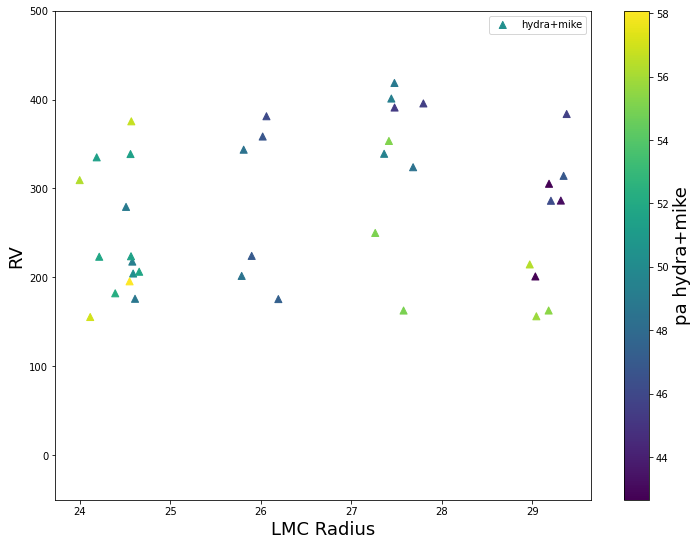

In [155]:
plt.figure(figsize=(12,9))

c = plt.scatter(good_hydramike_catalog['lmc_radius_correct'], good_hydramike_catalog['VHELIO'],  marker='^', c= pa_hydramike, s=50, cmap='viridis', linestyle='None', alpha=1, label = "hydra+mike")
cbar = plt.colorbar(c)
cbar.set_label('pa hydra+mike', fontsize=18)

plt.xlabel('LMC Radius', fontsize=18)
plt.ylabel('RV', fontsize=18)
plt.ylim(-50, 500)
plt.legend()
plt.show()

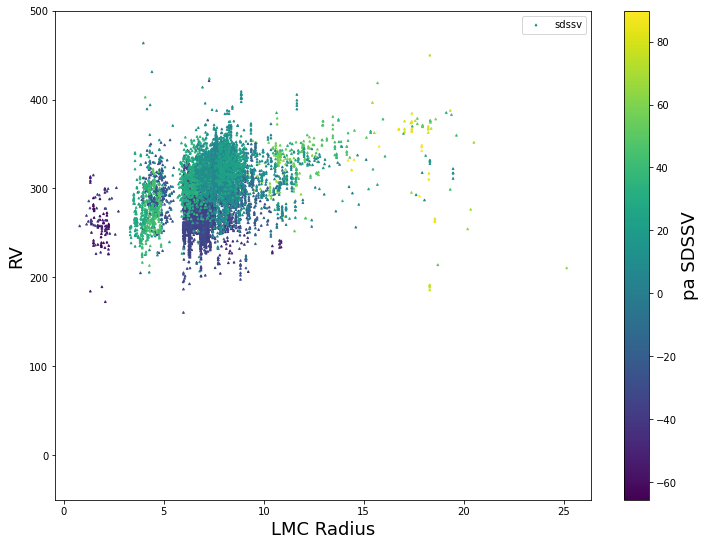

In [162]:
plt.figure(figsize=(12,9))

c = plt.scatter(good_sdssv_catalog['lmc_radius_correct'], good_sdssv_catalog['XCSAO_RV'],  marker='^', c= pa_sdssv, s=3, cmap='viridis', linestyle='None', alpha=1, label = "sdssv")
cbar = plt.colorbar(c)
cbar.set_label('pa SDSSV', fontsize=18)

plt.xlabel('LMC Radius', fontsize=18)
plt.ylabel('RV', fontsize=18)
plt.ylim(-50, 500)
plt.legend()
plt.show()

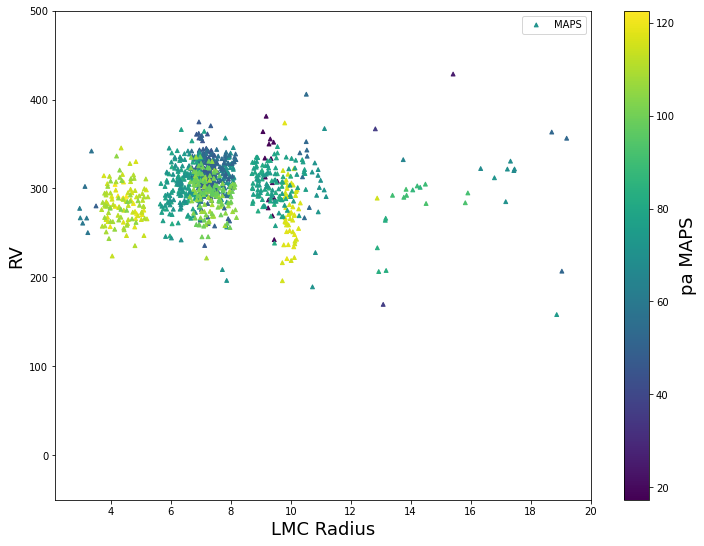

In [160]:
plt.figure(figsize=(12,9))

c = plt.scatter(good_maps_catalog['LMCRAD'], good_maps_catalog['VHELIO'],  marker='^', c= pa_maps, s=15, cmap='viridis', linestyle='None', alpha=1, label = "MAPS")
cbar = plt.colorbar(c)
cbar.set_label('pa MAPS', fontsize=18)

plt.xlabel('LMC Radius', fontsize=18)
plt.ylabel('RV', fontsize=18)
plt.ylim(-50, 500)
plt.legend()
plt.show()

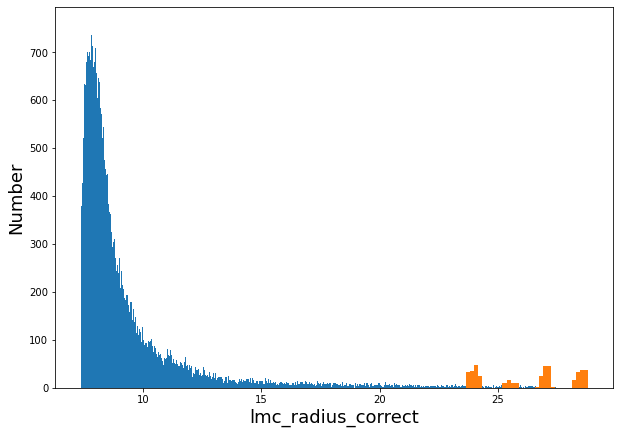

In [21]:
plt.figure(figsize=(10,7))
plt.hist(RGB_CMD_cut['lmc_radius_correct'], bins=600)
plt.hist(good_lmc_catalog['lmc_radius_correct'], bins=30)
plt.xlabel('lmc_radius_correct', fontsize=18)
plt.ylabel('Number', fontsize=18)
# plt.xlim(1,2.5)
plt.show()

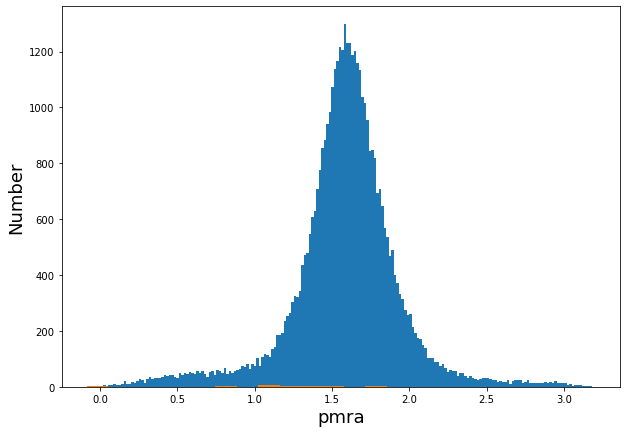

In [160]:
plt.figure(figsize=(10,7))
plt.hist(RGB_CMD_cut['pmra'], bins=200)
plt.hist(good_hydramike_catalog['pmra'], bins=20)
plt.xlabel('pmra', fontsize=18)
plt.ylabel('Number', fontsize=18)
# plt.xlim(1,2.5)
plt.show()

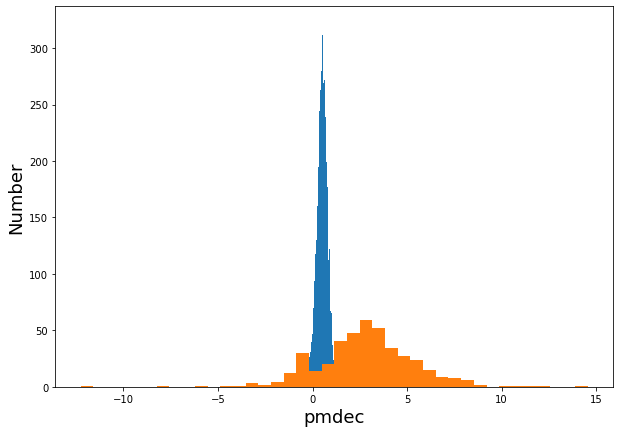

In [25]:
plt.figure(figsize=(10,7))
plt.hist(RGB_CMD_cut['pmdec'], bins=400)
plt.hist(good_lmc_catalog['pmdec'], bins=40)
plt.xlabel('pmdec', fontsize=18)
plt.ylabel('Number', fontsize=18)
# plt.xlim(1,2.5)
plt.show()

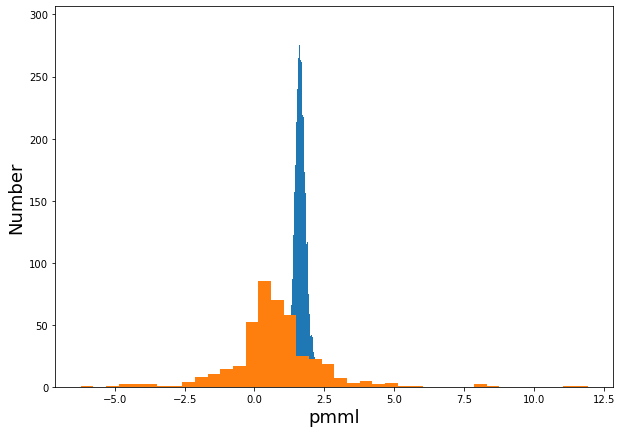

In [26]:
plt.figure(figsize=(10,7))
plt.hist(RGB_CMD_cut['pmml'], bins=400)
plt.hist(good_lmc_catalog['pmml'], bins=40)
plt.xlabel('pmml', fontsize=18)
plt.ylabel('Number', fontsize=18)
# plt.xlim(1,2.5)
plt.show()

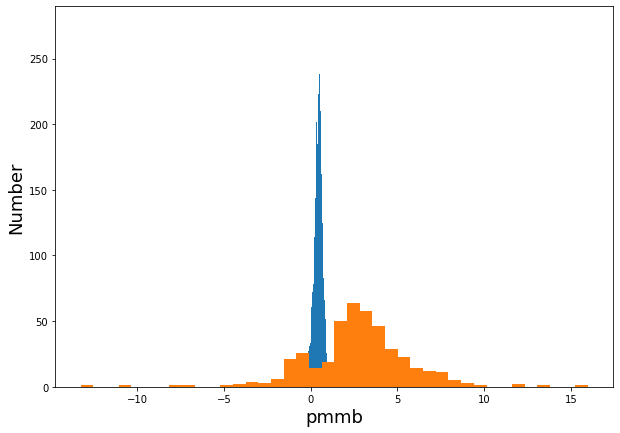

In [27]:
plt.figure(figsize=(10,7))
plt.hist(RGB_CMD_cut['pmmb'], bins=400)
plt.hist(good_lmc_catalog['pmmb'], bins=40)
plt.xlabel('pmmb', fontsize=18)
plt.ylabel('Number', fontsize=18)
# plt.xlim(1,2.5)
plt.show()